In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import unicodedata
import re
import json

import acquire
import prepare

All acquire functions loaded properly.
All prepare functions successfully loaded.


[nltk_data] Downloading package wordnet to /Users/luke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Exercises

## 1. Spam Data

### a. Load the spam data set.

In [3]:
# Provided clean function:

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
# Creating the df:

df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Using my own clean function:

df['basic_clean'] = df.text.apply(prepare.basic_clean)
df.head()

,label,text,basic_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [6]:
df['tokenized'] = df.basic_clean.apply(prepare.tokenize)
df.head()

,label,text,basic_clean,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [7]:
df['stem_text'] = df.text.apply(prepare.stem)
df.head()

,label,text,basic_clean,tokenized,stem_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. avail onli in b..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,Ok lar... joke wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri in 2 a wkli comp to win FA cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,U dun say so earli hor... U c alreadi then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,"nah I don't think he goe to usf, he live aroun..."


In [8]:
df['lemma_text'] = df.text.apply(prepare.lemmatize)
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,"nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around..."


In [9]:
# Removing stopwords:

df['text_filtered'] = df.lemma_text.apply(prepare.remove_stopwords)
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,"nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though"


In [10]:
# Adding the length of the document (number of words)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre...","[o, jurong, point, crazy, vailable, bugisgreat..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,"[k, lar, oking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[ree, entrywkly, comp, win, up, final, tkts, 2..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...,"[dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,"nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though","[ahthink, go, usf, life, around, though]"


#### Adding word length column:

In [11]:
# apparently I can only run this once...
len(df.words[0])

12

In [12]:
df['doc_length'] = [len(wordlist) for wordlist in df.words]
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre...","[o, jurong, point, crazy, vailable, bugisgreat...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,"[k, lar, oking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[ree, entrywkly, comp, win, up, final, tkts, 2...",19
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...,"[dun, say, early, horc, already, say]",6
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,"nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though","[ahthink, go, usf, life, around, though]",6


In [13]:
# Should be ready for explore now.

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [14]:
# So first off, need to split the spam data from the ham data.

ham_words = " ".join(df[df.label == 'ham'].text_filtered)
spam_words = " ".join(df[df.label == 'spam'].text_filtered)
all_words = " ".join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)
spam_words[0:100]

'Free entrywkly comp win FA Cup final tkts 21st May 2005. Text FA 87121 receive entry question(std tx'

In [15]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head()
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    352
I'm     275
get     274
ur      252
You     245
dtype: int64

In [16]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,basic_clean,tokenized,stem_text,lemma_text,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,"Go until jurong point, crazy.. avail onli in b...","Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre...","[o, jurong, point, crazy, vailable, bugisgreat...",12,"[(o, jurong), (jurong, point), (point, crazy),..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,Ok lar... joke wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,"[k, lar, oking, wifoni]",4,"[(k, lar), (lar, oking), (oking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[ree, entrywkly, comp, win, up, final, tkts, 2...",19,"[(ree, entrywkly), (entrywkly, comp), (comp, w..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,U dun say so earli hor... U c alreadi then say...,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...,"[dun, say, early, horc, already, say]",6,"[(dun, say), (say, early), (early, horc), (hor..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,"nah I don't think he goe to usf, he live aroun...","Nah I don't think he go to usf, he life around...","Nah I think go usf, life around though","[ahthink, go, usf, life, around, though]",6,"[(ahthink, go), (go, usf), (usf, life), (life,..."


In [17]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(Please, call)          25
(customer, service)     23
(GUARANTEED., Call)     19
(ï¿½1000, cash)         19
(To, claim)             19
(prize, GUARANTEED.)    19
(This, 2nd)             18
(URGENT!, Your)         17
(PRIVATE!, Your)        16
(PO, Box)               16
(Account, Statement)    16
(land, line.)           16
(Valid, 12hrs)          16
(selected, receive)     15
(call, customer)        15
(draw, show)            14
(We, trying)            14
(trying, contact)       14
(please, call)          14
(Call, MobileUpd8)      14
dtype: int64

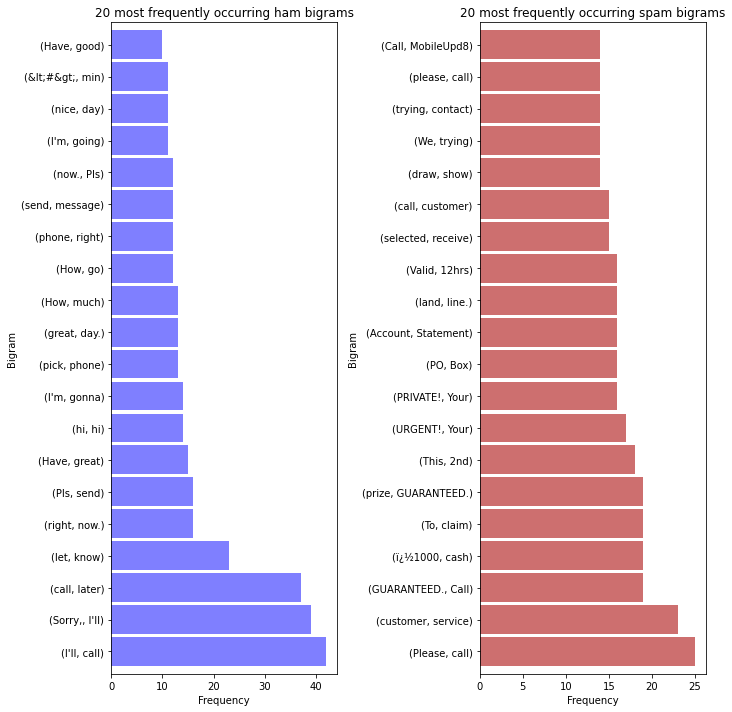

In [18]:
plt.subplot(121)
ham_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.5)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='firebrick', width=.9, figsize=(10, 10), alpha=.65)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

## Exploring with word clouds

In [19]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
data

{'Please call': 25,
 'customer service': 23,
 'GUARANTEED. Call': 19,
 'ï¿½1000 cash': 19,
 'To claim': 19,
 'prize GUARANTEED.': 19,
 'This 2nd': 18,
 'URGENT! Your': 17,
 'PRIVATE! Your': 16,
 'PO Box': 16,
 'Account Statement': 16,
 'land line.': 16,
 'Valid 12hrs': 16,
 'selected receive': 15,
 'call customer': 15,
 'draw show': 14,
 'We trying': 14,
 'trying contact': 14,
 'please call': 14,
 'Call MobileUpd8': 14}

(-0.5, 799.5, 399.5, -0.5)

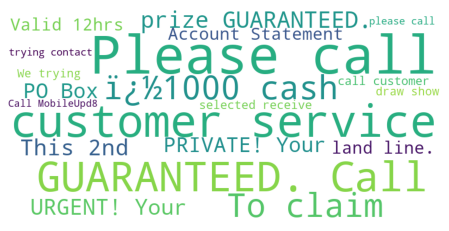

In [20]:
# Using the example that we learned in class:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Using an image as a mask/frame for word cloud

- Using the "Ham" words to create a wordcloud in the same of an actual ham.

In [25]:
from PIL import Image

In [26]:
mask = np.array(Image.open('ham_mask_finished.png'))

In [27]:
mask.shape

(412, 584, 4)

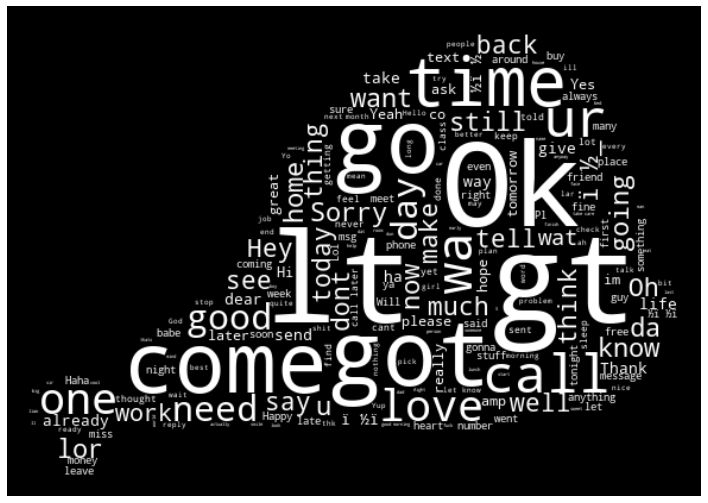

In [29]:
wc = WordCloud(background_color='black', mask=mask, mode='RGB', color_func = lambda *args, **kwargs: "white", width=1000, max_words=200, height=1000, random_state=1)
wc.generate(ham_words)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

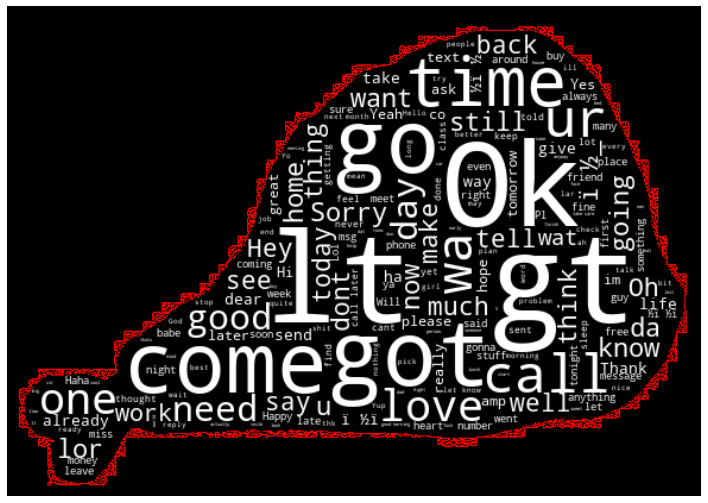

In [30]:
# Adding an outline of the mask:

wc = WordCloud(background_color='black', mask=mask, mode='RGB', color_func = lambda *args, **kwargs: "white", width=1000, max_words=200, height=1000, random_state=1,
              contour_width = .1, contour_color = 'red')
wc.generate(ham_words)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#### Takeaways:

- It was interesting to see how the numpy array actually works in this instance. I added the contour lines so that I could see what the numpy "mask" was actually doing, and you can see that it's drawing in roughly square lines, somewhat like a painter would use drafting/masking tape to cover over an area they don't want to paint, but that isn't exactly a precise cutout of the shape they're painting. 
- I was able to learn more about the arguments available in .imshow(), and also learn more about the different types of interpolation. Bilinear here basically "smudges" or blurs the outline a bit so that it's not quite as harsh an edge, meaning that the edge of the wordcloud appears to be a bit more smooth. I could have also used quadric or guassian or a number of other types of interpolation, but that would've increased the processing time for this image.

In [ ]:
# Exocortex links:

# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html
# https://towardsdatascience.com/generate-word-clouds-of-any-shape-in-python-e87f265f6352

### c. Is there any overlap in the bigrams for the spam data and the ham data?

- It doesn't appear there is any overlap.

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data

In [31]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
spam_trigrams

(prize, GUARANTEED., Call)             19
(call, customer, service)              15
(Your, 2003, Account)                  13
(PRIVATE!, Your, 2003)                 13
(We, trying, contact)                  13
(2003, Account, Statement)             13
(land, line., Claim)                   13
(show, 800, un-redeemed)               12
(This, 2nd, attempt)                   12
(URGENT!, Your, Mobile)                10
(guaranteed, ï¿½1000, cash)            10
(URGENT!, We, trying)                  10
(customer, service, representative)    10
(WON, guaranteed, ï¿½1000)             10
(txt, MUSIC, 87066)                     9
(I., M., points.)                       9
(800, un-redeemed, S.)                  9
(un-redeemed, S., I.)                   9
(draw, txt, MUSIC)                      9
(S., I., M.)                            9
dtype: int64

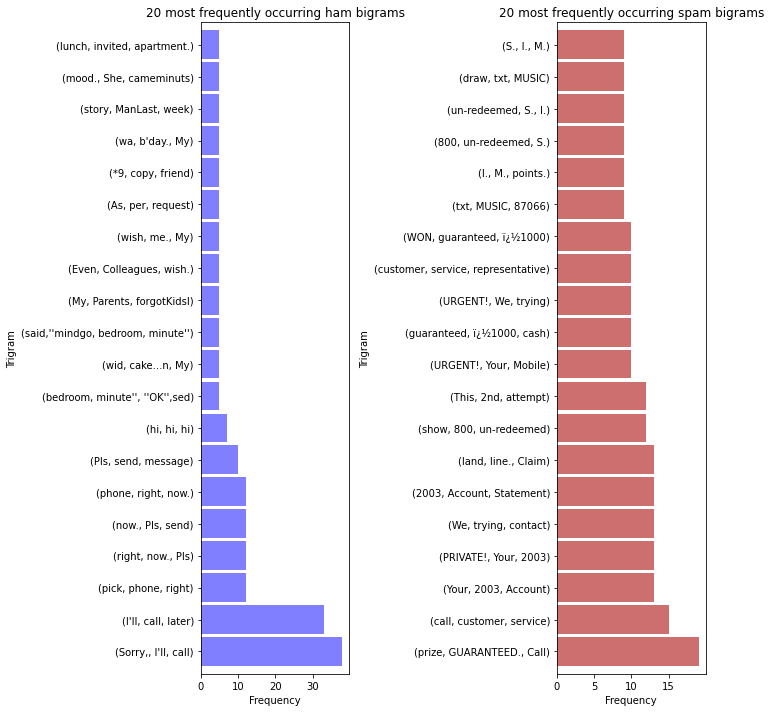

In [32]:
plt.subplot(121)
ham_trigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.5)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color='firebrick', width=.9, figsize=(10, 10), alpha=.65)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

#### Takeaway:

- There doesn't seem to be any significant overlap of terms (looking at a high level).
- The words within each trigram while having some overlap (of course) doesn't seem to hvae much meaning from human eyes, but perhaps there will be more meaning when it comes to the modeling.

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [33]:
blog_df = pd.read_json('big_blogs.json')
blog_df.head()

,title,content
0,What Data Science Career is For You?,If you’re struggling to see yourself as a data...
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ..."
2,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu..."
3,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...
4,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will..."


In [37]:
print(len(blog_df.content[0]))
print(blog_df.shape)

3908
(20, 2)


In [41]:
blog_df = prepare.prep_article_data(blog_df, 'content')

In [42]:
blog_df.head()

,title,content,stemmed,lemmatized,clean
0,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ...",set expect for life befor dure and after codeu...,setting expectation for life before during and...,setting expectation life codeuphave wondering ...
2,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...
3,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...,were excit to announc a huge codeup achiev inc...,were excited to announce a huge codeup achieve...,excited announce huge codeup achievement inc m...
4,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...


In [43]:
def add_columns(df):
    # add a column that is a list of each word for each repo 
    words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.clean] 

    # column name will be words, and the column will contain lists of the words in each doc
    df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

    # add a column that shows the length 
    df['doc_length'] = [len(wordlist) for wordlist in df.words]
    return df

In [45]:
blog_df = add_columns(blog_df)
blog_df.head()

,title,content,stemmed,lemmatized,clean,words,doc_length
0,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes...",367
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ...",set expect for life befor dure and after codeu...,setting expectation for life before during and...,setting expectation life codeuphave wondering ...,"[setting, expectation, life, codeuphave, wonde...",701
2,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,...",170
3,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...,were excit to announc a huge codeup achiev inc...,were excited to announce a huge codeup achieve...,excited announce huge codeup achievement inc m...,"[excited, announce, huge, codeup, achievement,...",371
4,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m...",195


### WordCloud

In [50]:
# Developing the word groups:

blog_words = blog_df.lemmatized[1]
duck_mask = np.array(Image.open('ducky_solid.png'))

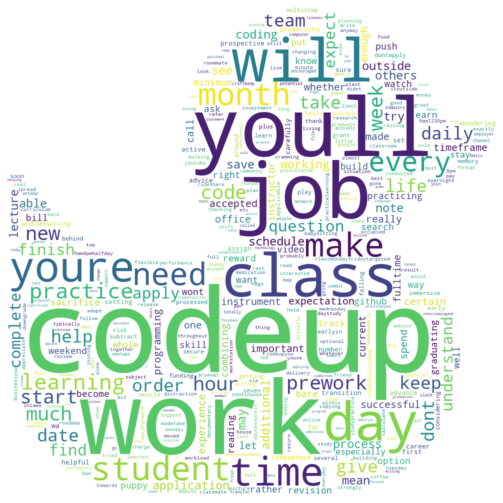

In [54]:
wc = WordCloud(mask=duck_mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(blog_words)
plt.figure(figsize = (13,9))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.